In [1]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta #moving avg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#load the data 
wmt_df = pd.read_csv('WMT_14_19.csv')

In [3]:
wmt_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-17,76.730003,76.820000,76.029999,76.190002,62.755169,11440700
1,2014-01-21,76.250000,76.389999,74.860001,75.839996,62.466919,8971100
2,2014-01-22,76.080002,76.080002,75.029999,75.349998,62.063290,5853700
3,2014-01-23,74.839996,75.120003,74.470001,74.959999,61.742085,6006300
4,2014-01-24,74.730003,75.120003,74.230003,74.419998,61.297295,9332800


In [4]:
#Inspect it 
print(wmt_df)

            Date       Open       High        Low      Close  Adj Close  \
0     2014-01-17  76.730003  76.820000  76.029999  76.190002  62.755169   
1     2014-01-21  76.250000  76.389999  74.860001  75.839996  62.466919   
2     2014-01-22  76.080002  76.080002  75.029999  75.349998  62.063290   
3     2014-01-23  74.839996  75.120003  74.470001  74.959999  61.742085   
4     2014-01-24  74.730003  75.120003  74.230003  74.419998  61.297295   
...          ...        ...        ...        ...        ...        ...   
1253  2019-01-10  93.879997  94.980003  93.120003  94.959999  89.053589   
1254  2019-01-11  94.989998  95.290001  94.550003  94.839996  88.941063   
1255  2019-01-14  94.480003  95.449997  94.279999  94.949997  89.044228   
1256  2019-01-15  95.470001  96.599998  95.379997  96.250000  90.263344   
1257  2019-01-16  95.930000  96.860001  95.830002  96.349998  90.357132   

        Volume  
0     11440700  
1      8971100  
2      5853700  
3      6006300  
4      9332800

In [5]:
#print the summary 
print(wmt_df.describe())

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     78.248307    78.826876    77.722671    78.273514    69.148844   
std      10.579113    10.686520    10.455335    10.574986    11.129199   
min      56.389999    57.060001    56.299999    56.419998    48.553188   
25%      71.110001    71.639999    70.704998    71.139999    61.977370   
50%      76.229999    76.575001    75.860001    76.175003    64.772007   
75%      85.837497    86.355000    85.105002    85.792498    76.633310   
max     109.139999   109.980003   107.989998   109.550003   100.354187   

             Volume  
count  1.258000e+03  
mean   8.672326e+06  
std    5.033155e+06  
min    2.482800e+06  
25%    6.054525e+06  
50%    7.513200e+06  
75%    9.695500e+06  
max    8.089810e+07  


In [6]:
# load data set 2
wmt_df2 = pd.read_csv('WMT_2020_2022.csv')

In [7]:
wmt_df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-17,116.050003,116.300003,114.639999,114.959999,109.993027,10045000
1,2020-01-21,114.589996,115.690002,114.519997,115.589996,110.595795,7353700
2,2020-01-22,115.220001,116.529999,115.180000,116.099998,111.083771,4926100
3,2020-01-23,116.209999,116.309998,115.040001,115.809998,110.806297,4305100
4,2020-01-24,116.000000,116.029999,114.150002,114.370003,109.428535,4383400


In [8]:
#Inspect the 2020-2022
print(wmt_df2)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-01-17  116.050003  116.300003  114.639999  114.959999  109.993027   
1    2020-01-21  114.589996  115.690002  114.519997  115.589996  110.595795   
2    2020-01-22  115.220001  116.529999  115.180000  116.099998  111.083771   
3    2020-01-23  116.209999  116.309998  115.040001  115.809998  110.806297   
4    2020-01-24  116.000000  116.029999  114.150002  114.370003  109.428535   
..          ...         ...         ...         ...         ...         ...   
648  2022-08-15  131.630005  133.570007  131.360001  132.600006  132.600006   
649  2022-08-16  138.899994  140.929993  138.190002  139.369995  139.369995   
650  2022-08-17  138.570007  142.720001  138.399994  139.520004  139.520004   
651  2022-08-18  139.529999  140.419998  138.500000  139.070007  139.070007   
652  2022-08-19  138.919998  139.070007  136.910004  137.020004  137.020004   

       Volume  
0    10045000  
1     7353700  
2  

In [9]:
#print the summary 
print(wmt_df2.describe())

             Open        High         Low       Close   Adj Close  \
count  653.000000  653.000000  653.000000  653.000000  653.000000   
mean   136.290123  137.645727  135.109663  136.363201  133.367264   
std     11.033342   10.785048   11.132874   10.894256   11.379848   
min    105.199997  108.519997  102.000000  104.050003   99.554413   
25%    129.000000  130.149994  127.730003  129.000000  125.454193   
50%    139.339996  140.369995  138.220001  139.369995  136.472580   
75%    144.160004  145.360001  143.020004  144.229996  141.265076   
max    160.250000  160.770004  159.070007  159.869995  158.600250   

             Volume  
count  6.530000e+02  
mean   8.787900e+06  
std    4.709867e+06  
min    3.018200e+06  
25%    6.134100e+06  
50%    7.442900e+06  
75%    9.817700e+06  
max    4.431340e+07  


In [10]:
#now prep the data for 2014-2019
wmt_df.set_index(pd.DatetimeIndex(wmt_df['Date']), inplace=True)

In [11]:
#now prep the data for 2020-2022
wmt_df2.set_index(pd.DatetimeIndex(wmt_df2['Date']), inplace=True)

In [12]:
#Keep the close for 2014-19
wmt_df = wmt_df[['Close']]

In [13]:
print(wmt_df)

                Close
Date                 
2014-01-17  76.190002
2014-01-21  75.839996
2014-01-22  75.349998
2014-01-23  74.959999
2014-01-24  74.419998
...               ...
2019-01-10  94.959999
2019-01-11  94.839996
2019-01-14  94.949997
2019-01-15  96.250000
2019-01-16  96.349998

[1258 rows x 1 columns]


In [14]:
#Keep the close 2020-22
wmt_df2 = wmt_df2[['Close']]

In [15]:
print(wmt_df2)

                 Close
Date                  
2020-01-17  114.959999
2020-01-21  115.589996
2020-01-22  116.099998
2020-01-23  115.809998
2020-01-24  114.370003
...                ...
2022-08-15  132.600006
2022-08-16  139.369995
2022-08-17  139.520004
2022-08-18  139.070007
2022-08-19  137.020004

[653 rows x 1 columns]


In [16]:
#Create a Variable to predict 2020-2022
prediction_days = 599

# Create an new column that targets the data and 
# predict values of x day away from the current price 
wmt_df['Actual Prediction'] = wmt_df[['Close']].shift(-prediction_days)


In [17]:
#print the new column for 2014-19
wmt_df

,Close,Actual Prediction
Date,,
2014-01-17,76.190002,71.050003
2014-01-21,75.839996,71.029999
2014-01-22,75.349998,71.279999
2014-01-23,74.959999,71.089996
2014-01-24,74.419998,71.139999
...,...,...
2019-01-10,94.959999,NaN
2019-01-11,94.839996,NaN
2019-01-14,94.949997,NaN


In [18]:
# Create independent dataset X and create a numpy array
X=X = np.array(wmt_df[['Close']])

In [19]:
#Git rid of any Nan/rows 
X=X[:-prediction_days]
#print(X)

In [20]:
#Creat the dependetnt data for Y
Y=wmt_df['Actual Prediction'].values


In [21]:
Y=Y[:-prediction_days]
# print(Y)

In [22]:
# train and test ratio is 70% traing and 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [23]:
#Creat the model
l_r = LinearRegression()
#train the model
l_r.fit(x_train, y_train)

LinearRegression()

In [24]:
#test the model using score
linear_score=l_r.score(x_test,y_test)
print(linear_score)

0.33278331990608256


In [25]:
#well I think that im going to predict the last 500days.
acutal_days=np.array(wmt_df[['Close']])[-prediction_days:]
# acutal_days

In [26]:
#print the liner regression prediction  for the next 599 days

linear_prediction=l_r.predict(acutal_days)

# linear_prediction


In [28]:
#okay this is were we put the 2020-2022 data in 
actual_20_22=np.array(wmt_df2[['Close']])
# actual_20_22

In [29]:
linear_prediction.shape

(599,)

In [30]:
actual_20_22.shape 

(653, 1)

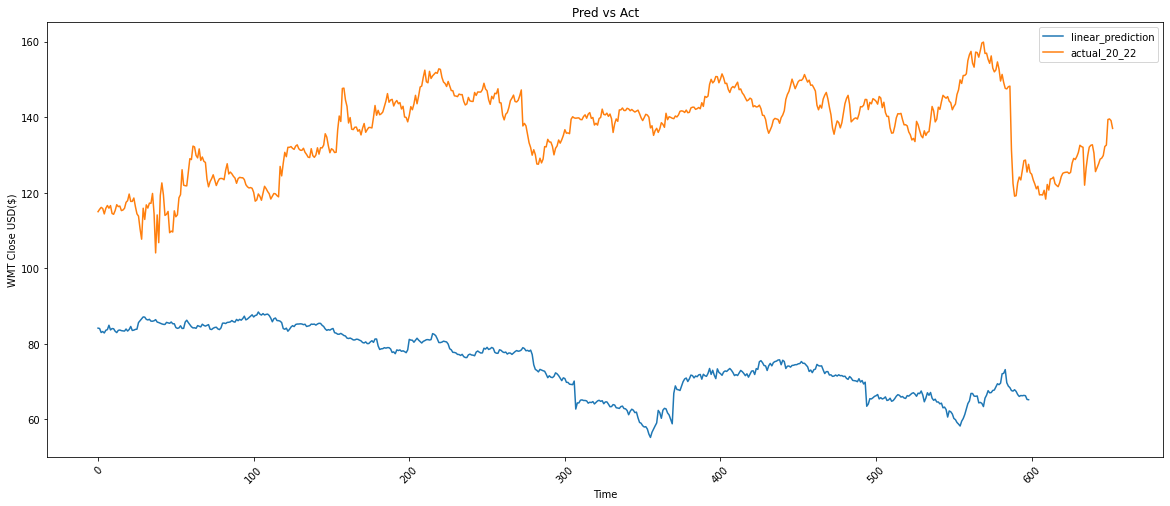

In [31]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(linear_prediction) # lable='Prediction' , lw=2, alpha=.7)
plt.plot(actual_20_22) #  , lable='Actual') # , lw=2, alpha=.7)
plt.title('Pred vs Act')
plt.xlabel('Time')
plt.ylabel('WMT Close USD($)')
plt.legend(['linear_prediction', 'actual_20_22'])
plt.xticks(rotation=45)
plt.show()